In [1]:
# setting up GPU to not consume all memory
# using GPU 0
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
import pickle

from helpers import *

Using TensorFlow backend.


In [2]:
x_train, y_train, x_test, y_test = get_mnist(in_scaler = 1., out_scaler = 1.)

In [3]:
# from MNISTNetRegComparisonReluL5N200Repeat.py
N = [28 ** 2, 200, 150, 100, 50, 20, 10]
KLips = 1.
func = activation = 'relu'
p_fail = 0.3

In [4]:
model = Sequential()
for i in range(len(N) - 1):
    N_pre, N_post = N[i : i + 2]
    is_last = i == len(N) - 2
    is_first = i == 0
    print("Layer %d: first %d last %d %d=>%d" % (i, is_first, is_last, N_pre, N_post))
    model.add(Dense(N_post, input_shape = (N_pre, ),
                    kernel_initializer = Constant(np.random.randn(N_pre, N_post) * np.sqrt(2. / N_pre)),
                    activation = 'linear' if is_last else get_custom_activation(KLips, func),
                    bias_initializer = 'random_normal'))
    if is_first:
        model.add(PermanentDropout(p_fail))

Layer 0: first 1 last 0 784=>200
Layer 1: first 0 last 0 200=>150
Layer 2: first 0 last 0 150=>100
Layer 3: first 0 last 0 100=>50
Layer 4: first 0 last 0 50=>20
Layer 5: first 0 last 1 20=>10


In [5]:
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy', 'mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
lambda_1 (Lambda)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
Total para

In [6]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 20000, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.1955 - acc: 0.1110 - mean_squared_error: 0.1955 - val_loss: 0.1116 - val_acc: 0.1328 - val_mean_squared_error: 0.1116
Epoch 2/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.1068 - acc: 0.1477 - mean_squared_error: 0.1068 - val_loss: 0.1005 - val_acc: 0.1685 - val_mean_squared_error: 0.1005
Epoch 3/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0988 - acc: 0.1782 - mean_squared_error: 0.0988 - val_loss: 0.0955 - val_acc: 0.2030 - val_mean_squared_error: 0.0955
Epoch 4/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0942 - acc: 0.2150 - mean_squared_error: 0.0942 - val_loss: 0.0918 - val_acc: 0.2362 - val_mean_squared_error: 0.0918
Epoch 5/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0912 - acc: 0.2406 - mean_squared_error: 0.0912 - val_loss: 0.0894 - val

Epoch 42/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0569 - acc: 0.6294 - mean_squared_error: 0.0569 - val_loss: 0.0562 - val_acc: 0.6456 - val_mean_squared_error: 0.0562
Epoch 43/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0566 - acc: 0.6356 - mean_squared_error: 0.0566 - val_loss: 0.0557 - val_acc: 0.6439 - val_mean_squared_error: 0.0557
Epoch 44/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0562 - acc: 0.6390 - mean_squared_error: 0.0562 - val_loss: 0.0553 - val_acc: 0.6507 - val_mean_squared_error: 0.0553
Epoch 45/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0557 - acc: 0.6466 - mean_squared_error: 0.0557 - val_loss: 0.0549 - val_acc: 0.6558 - val_mean_squared_error: 0.0549
Epoch 46/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0553 - acc: 0.6499 - mean_squared_error: 0.0553 - val_loss: 0.0546 - val_acc: 0.6617 - val_mean_squared_error: 0.0546


Epoch 83/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0403 - acc: 0.8010 - mean_squared_error: 0.0403 - val_loss: 0.0396 - val_acc: 0.8070 - val_mean_squared_error: 0.0396
Epoch 84/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0399 - acc: 0.8048 - mean_squared_error: 0.0399 - val_loss: 0.0393 - val_acc: 0.8049 - val_mean_squared_error: 0.0393
Epoch 85/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0396 - acc: 0.8049 - mean_squared_error: 0.0396 - val_loss: 0.0391 - val_acc: 0.8100 - val_mean_squared_error: 0.0391
Epoch 86/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0394 - acc: 0.8067 - mean_squared_error: 0.0394 - val_loss: 0.0388 - val_acc: 0.8085 - val_mean_squared_error: 0.0388
Epoch 87/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0390 - acc: 0.8081 - mean_squared_error: 0.0390 - val_loss: 0.0384 - val_acc: 0.8162 - val_mean_squared_error: 0.0384


Epoch 124/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0302 - acc: 0.8677 - mean_squared_error: 0.0302 - val_loss: 0.0299 - val_acc: 0.8709 - val_mean_squared_error: 0.0299
Epoch 125/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0301 - acc: 0.8668 - mean_squared_error: 0.0301 - val_loss: 0.0298 - val_acc: 0.8745 - val_mean_squared_error: 0.0298
Epoch 126/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0299 - acc: 0.8708 - mean_squared_error: 0.0299 - val_loss: 0.0294 - val_acc: 0.8698 - val_mean_squared_error: 0.0294
Epoch 127/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0297 - acc: 0.8690 - mean_squared_error: 0.0297 - val_loss: 0.0295 - val_acc: 0.8748 - val_mean_squared_error: 0.0295
Epoch 128/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0296 - acc: 0.8718 - mean_squared_error: 0.0296 - val_loss: 0.0290 - val_acc: 0.8723 - val_mean_squared_error: 0.

Epoch 165/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0234 - acc: 0.9020 - mean_squared_error: 0.0234 - val_loss: 0.0229 - val_acc: 0.9025 - val_mean_squared_error: 0.0229
Epoch 166/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0232 - acc: 0.9024 - mean_squared_error: 0.0232 - val_loss: 0.0226 - val_acc: 0.9079 - val_mean_squared_error: 0.0226
Epoch 167/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0231 - acc: 0.9020 - mean_squared_error: 0.0231 - val_loss: 0.0225 - val_acc: 0.9083 - val_mean_squared_error: 0.0225
Epoch 168/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0230 - acc: 0.9039 - mean_squared_error: 0.0230 - val_loss: 0.0224 - val_acc: 0.9062 - val_mean_squared_error: 0.0224
Epoch 169/200
60000/60000 [==============================] - 0s 5us/step - loss: 0.0229 - acc: 0.9035 - mean_squared_error: 0.0229 - val_loss: 0.0222 - val_acc: 0.9112 - val_mean_squared_error: 0.

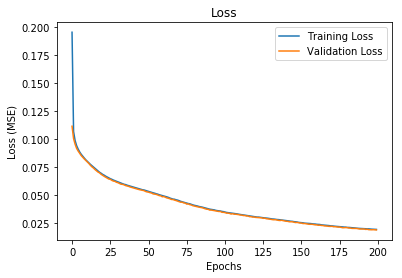

In [7]:
plt.figure()
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

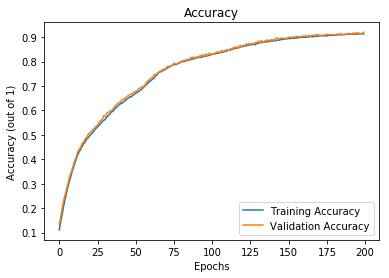

In [8]:
plt.figure()
plt.title('Accuracy')
plt.plot(history.history['acc'], label = 'Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (out of 1)')
plt.legend()
plt.show()

In [9]:
acc = np.mean(np.argmax(model.predict(x_test), axis = 1) == np.argmax(y_test, axis = 1))

In [11]:
print('Accuracy with dropout of a network trained with dropout is %.3f' % acc)

Accuracy with dropout of a network trained with dropout is 0.915
